In [132]:
## load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
RSEED=42

In [133]:
## helper functions

# define root mean square error
def RMSE(x,y):
    return np.sqrt(np.mean((x-y)**2))    

In [134]:
df=pd.read_csv('data/train_modelling.csv')
df.head()

,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,target
0,22.299527,0.000000,0.758530,209.574655,0.677348,45.126304
1,24.679063,0.007025,0.758058,177.109855,0.899208,79.131702
2,24.112317,0.151767,0.712944,201.373211,1.038656,32.661304
3,20.845273,1.127273,0.898326,259.973977,1.365202,53.850238
4,21.870732,0.005100,0.785134,181.944779,0.729763,177.418750


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_temp          15539 non-null  float64
 1   mean_precip        15539 non-null  float64
 2   mean_rel_humidity  15539 non-null  float64
 3   mean_wind_dir      15539 non-null  float64
 4   mean_wind_spd      15539 non-null  float64
 5   target             15539 non-null  float64
dtypes: float64(6)
memory usage: 728.5 KB


In [136]:
# perform and evaluate baseline model
y_pred_baseline = np.ones(df.target.shape[0]) * np.mean(df.target)
score = RMSE(df.target,y_pred_baseline)
print(score)


42.372336436960055


In [137]:
X,y=df.iloc[:,:-1],df.iloc[:,-1]

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=RSEED)

<AxesSubplot:>

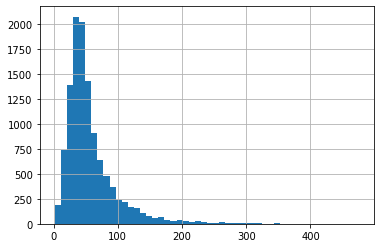

In [139]:
#X_train.hist(bins=30)
y_train.hist(bins=50)

<AxesSubplot:>

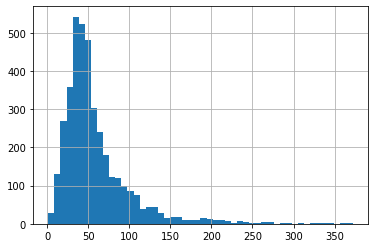

In [140]:
y_test.hist(bins=50)

In [141]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [142]:
lr.coef_

array([ -7.55220727,  -8.86381762, -75.72039278,   0.11294901,
        -4.90435158])

In [143]:
lr.intercept_

274.5506999521161

In [144]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print(f'train_pred: {y_pred_train.shape} test_pred: {y_pred_test.shape}')


train_pred: (11654,) test_pred: (3885,)


In [145]:
print(f'RMSE_train: {RMSE(y_pred_train,y_train).round(2)} RMSE_test: {RMSE(y_pred_test,y_test).round(2)}')

RMSE_train: 41.02 RMSE_test: 41.88


In [146]:
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred_test)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))}')
print(f'R_Squared: {metrics.r2_score(y_test,y_pred_test)}')

MAE: 27.959520712589953
MSE: 1754.2365715521034
RMSE: 41.88360743240849
R_Squared: 0.055194283128565336


In [147]:
import statsmodels.formula.api as smf
model=smf.ols(formula='target~ mean_temp + mean_precip + mean_rel_humidity +mean_wind_dir+mean_wind_spd',
data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     174.6
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          2.29e-181
Time:                        16:53:10   Log-Likelihood:                -79841.
No. Observations:               15539   AIC:                         1.597e+05
Df Residuals:                   15533   BIC:                         1.597e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           283.8865     18.913     15.010      0.000     246.815     320.958
mean_temp            -7.8431      0.493    -15.922      0.000      -8.809      -6.878
mean_precip         -11.4714      1.889     -6.073      0.000     -15.174      -7.769
mean_rel_humidity   -74.5698      9.483     -7.864      0.000     -93.157     -55.982
mean_wind_dir         0.1003      0.013      7.733      0.000       0.075       0.126
mean_wind_spd        -5.3621      0.678     -7.904      0.000      -6.692      -4.032
==============================================================================
Omnibus:                     8738.363   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85531.056
Skew:                           2.561   Prob(JB):                         0.00
Kurtosis:                      13.290   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Decision Tree

In [148]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [169]:
y_pred=tree.predict(X_test)
y_pred

array([ 27.39882353,  69.7787234 ,  81.08177778, ...,  62.28975738,
       125.49409091,  34.9275    ])

In [170]:
tree.score(X_test,y_test)

0.2457808390911742

In [172]:
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R_Squared: {metrics.r2_score(y_test,y_pred)}')

MAE: 21.58079846834589
MSE: 1400.371326512244
RMSE: 37.421535597998165
R_Squared: 0.2457808390911742


# Scaling

In [151]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [152]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [153]:
y_pred_scaled=lr.predict(X_test_scaled)

/Users/paulosgidyelew/Desktop/GitHub/Git_Neuefische/Project2_AirQuality/.venv/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [154]:
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred_scaled)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred_scaled)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_scaled))}')
print(f'R_Squared: {metrics.r2_score(y_test,y_pred_scaled)}')

MAE: 27.959520712589953
MSE: 1754.2365715521034
RMSE: 41.88360743240849
R_Squared: 0.055194283128565336


# Random Forest

In [166]:
from sklearn.ensemble import RandomForestRegressor
for i in range(20,100,10):
    forest = RandomForestRegressor(n_estimators=i,
                                    criterion='squared_error',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=RSEED,
                                    verbose=0,
                                    warm_start=False,
                                    ccp_alpha=0.0,
                                    max_samples=None)
    forest.fit(X_train,y_train)
    y_pred_forest=forest.predict(X_test)
    print(f'tree size:{i} RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_forest))} R2: {forest.score(X_test,y_test)}')
  

tree size:20 RMSE: 28.910857442326588 R2: 0.5498302626880153
tree size:30 RMSE: 28.82751935910138 R2: 0.5524218296188502
tree size:40 RMSE: 28.74504657464467 R2: 0.5549791232383012
tree size:50 RMSE: 28.685093987643295 R2: 0.5568335178595694
tree size:60 RMSE: 28.610210529345423 R2: 0.5591443014597421
tree size:70 RMSE: 28.63607929256849 R2: 0.5583467157532381
tree size:80 RMSE: 28.574434021211086 R2: 0.5602461749329641
tree size:90 RMSE: 28.524263208834704 R2: 0.5617890532810688


In [168]:
print(f'MAE: {metrics.mean_absolute_error(y_test,y_pred_forest)}')
print(f'MSE: {metrics.mean_squared_error(y_test,y_pred_forest)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_forest))}')
print(f'R_Squared: {metrics.r2_score(y_test,y_pred_forest)}')

MAE: 17.32574214572186
MSE: 813.633591606881
RMSE: 28.524263208834704
R_Squared: 0.5617890532810688
